# QMSolver: Finite Square Well with SI Units

This notebook demonstrates how to use QMSolver with **SI (International System) units** instead of dimensionless units. 
The finite square well problem for an electron will be solved.

In [5]:
import numpy as np
from scipy import constants

from qmsolver.tise import FDSolver
from qmsolver.potentials import FiniteSquareWellPotential

print("Physical constants loaded:")
print(f"Reduced Planck's constant (ħ): {constants.hbar:.8e} J⋅s")
print(f"Electron mass (m_e): {constants.m_e:.8e} kg")
print(f"Electron charge (e): {constants.e:.8e} C")

Physical constants loaded:
Reduced Planck's constant (ħ): 1.05457182e-34 J⋅s
Electron mass (m_e): 9.10938371e-31 kg
Electron charge (e): 1.60217663e-19 C


In [6]:
well_depth_ev = 1.0  # Well depth in electron volts
well_width_nm = 1.0  # Well width in nanometers

# Convert to SI units
well_depth_joules = well_depth_ev * constants.e  # Convert eV to Joules
well_width_meters = well_width_nm * 1e-9  # Convert nm to meters

# Spatial domain (extend well beyond the actual well)
x_min_m = -3e-9
x_max_m = 3e-9

print("Physical parameters:")
print(f"Well depth: {well_depth_ev} eV = {well_depth_joules:.8e} J")
print(f"Well width: {well_width_nm} nm = {well_width_meters:.1e} m")
print(f"Spatial domain: [{x_min_m:.1e}, {x_max_m:.1e}] m")

Physical parameters:
Well depth: 1.0 eV = 1.60217663e-19 J
Well width: 1.0 nm = 1.0e-09 m
Spatial domain: [-3.0e-09, 3.0e-09] m


****************************************

-> 3 lowest energy states:

      E(0) = -1.297613251785845e-19
      E(1) = -4.7950999500587644e-20
      E(2) = 7.54877077796044e-21

****************************************


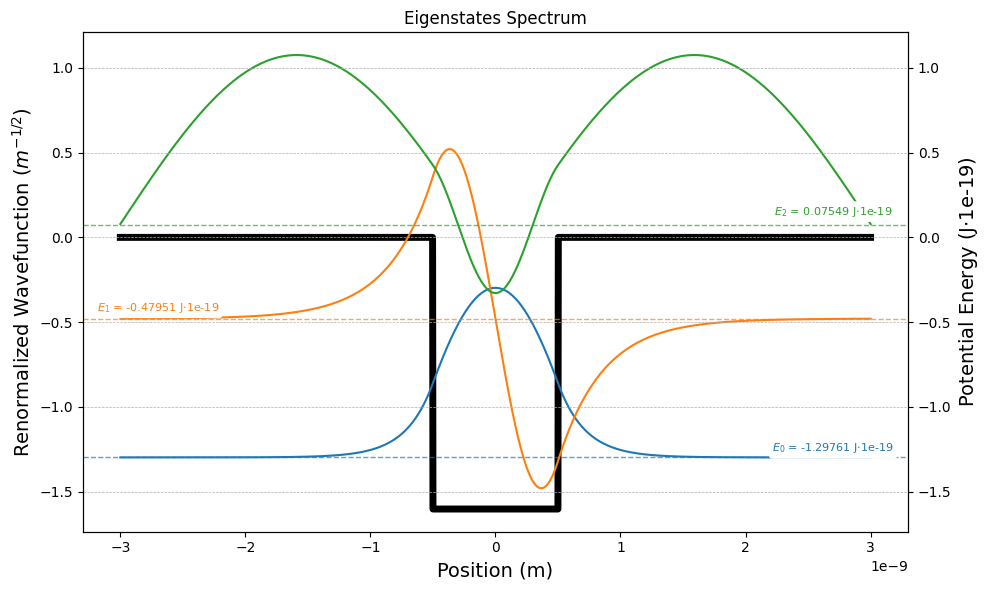

In [7]:
solver = FDSolver(steps=2_000, x_min=x_min_m, x_max=x_max_m, n_lowest=3)

# Set physical constants (SI units)
solver.h_bar = constants.hbar  # Reduced Planck's constant in J⋅s
solver.m = constants.m_e  # Electron mass in kg

potential = FiniteSquareWellPotential(
    x_grid=solver.x_grid,
    well_depth=well_depth_joules,
    well_width=well_width_meters,
)
solver.potential_generator = potential

solver.solve()
solver.output()
solver.plot(is_dimensionless=False, scale=1e19, energy_units="J")

# Convert to eV 

To get the eigenenergies in eV, after solving the the system in SI units, device by the electron charge constant

In [8]:
E_lowest_ev = np.array(solver.E_lowest) / constants.e
print("\nEnergies in electron volts:")
for i, energy in enumerate(E_lowest_ev):
    print(f"E({i}) = {energy:.8f} eV")


Energies in electron volts:
E(0) = -0.80990649 eV
E(1) = -0.29928660 eV
E(2) = 0.04711572 eV
